# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


# Load and Explore Data

In [2]:
# Make sure to use r"" or double \\ or forward slashes /
df = pd.read_excel(r"C:\Users\sintu.DESKTOP-HVVV5FJ\Desktop\Sintupy\sintupy\diabetes\diabetes_prediction_dataset updated.xlsx")

print(df.head())
print(df.info())
print(df['Age_Group'].value_counts())

   Gender  Age  Hypertension  Heart_Disease Smoking_History    BMI  \
0  Female   80             0              1           never  25.19   
1  Female   54             0              0         No Info  27.32   
2    Male   28             0              0           never  27.32   
3  Female   36             0              0         current  23.45   
4    Male   76             1              1         current  20.14   

   HbA1c_Level  Blood_Glucose_Level  Diabetes Age_Group  Lifestyle_Index  \
0          6.6                  140         0    Senior                1   
1          6.6                   80         0     Adult                1   
2          5.7                  158         0     Adult                1   
3          5.0                  155         0     Adult                1   
4          4.8                  155         0    Senior                2   

   Is_At_Risk  Normalized_Age  Normalized_BMI  
0           1        1.000000        0.816877  
1           0        0.670

# Preprocess Data

In [3]:
# Encode binary categories
le_gender = LabelEncoder()
le_smoke = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Smoking_History'] = le_smoke.fit_transform(df['Smoking_History'])

# One-hot encode multi-class category
df = pd.get_dummies(df, columns=['Age_Group'], drop_first=True)

# Split features and target
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']


# Split into Train/Test Sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (for Logistic Regression)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Models

In [6]:
# Logistic Regression
logreg = LogisticRegression(max_iter=500, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

# Evaluate Models

In [7]:
# Predict
y_pred_lr = logreg.predict(X_test_scaled)
y_pred_dt = dtree.predict(X_test)

# Scores
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Reports
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dt))


Logistic Regression Accuracy: 0.96025
Decision Tree Accuracy: 0.95245
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.88      0.62      0.73      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.74      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



# Confusion Matrix

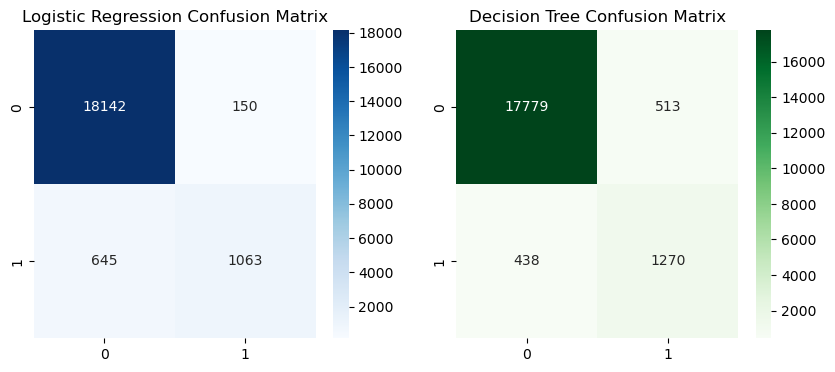

In [8]:
cm_logreg = confusion_matrix(y_test, y_pred_lr)
cm_tree = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(10, 4))

# LR
plt.subplot(1, 2, 1)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')

# DT
plt.subplot(1, 2, 2)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')

plt.show()

# AUC-ROC Curve

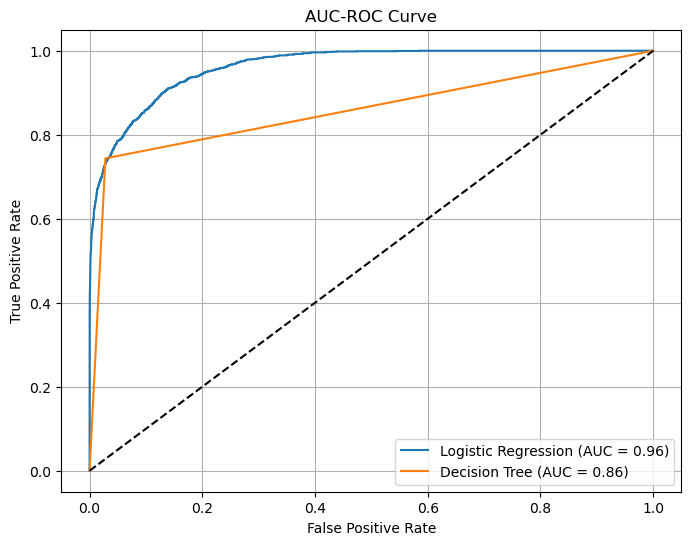

In [9]:
y_proba_lr = logreg.predict_proba(X_test_scaled)[:, 1]
y_proba_dt = dtree.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_lr):.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_proba_dt):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.grid()
plt.show()


# Feature Importance

In [10]:
# Logistic Regression Coefficients
print("Logistic Regression Feature Importance:")
importance_lr = pd.Series(logreg.coef_[0], index=X.columns)
print(importance_lr.sort_values(ascending=False))

# Decision Tree
print("Decision Tree Feature Importance:")
importance_dt = pd.Series(dtree.feature_importances_, index=X.columns)
print(importance_dt.sort_values(ascending=False))


Logistic Regression Feature Importance:
HbA1c_Level            2.510641
Blood_Glucose_Level    1.617331
BMI                    0.554340
Age                    0.362681
Normalized_Age         0.362681
Normalized_BMI         0.362681
Smoking_History        0.239614
Lifestyle_Index        0.213335
Heart_Disease          0.200203
Hypertension           0.187374
Age_Group_Child        0.141926
Gender                 0.123985
Age_Group_Senior      -0.042476
Is_At_Risk            -0.531613
dtype: float64
Decision Tree Feature Importance:
HbA1c_Level            0.489422
Blood_Glucose_Level    0.261854
BMI                    0.121382
Normalized_Age         0.029720
Smoking_History        0.024121
Age                    0.022063
Normalized_BMI         0.020016
Gender                 0.012722
Lifestyle_Index        0.006577
Heart_Disease          0.004492
Hypertension           0.003989
Is_At_Risk             0.002701
Age_Group_Senior       0.000860
Age_Group_Child        0.000081
dtype: float64


# Tune Hyperparameters

In [11]:
# Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_lr = GridSearchCV(LogisticRegression(max_iter=500), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_scaled, y_train)
print("Best Logistic Regression:", grid_lr.best_params_)

# Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
print("Best Decision Tree:", grid_dt.best_params_)


Best Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
